In [2]:
from imports import *

In [3]:
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/'

In [4]:
galaxy = 'ic1954'
filters = ['f657n', 'f555w', 'f814w']
instruments = ['uvis', 'uvis', 'uvis']

pipeline = PyHSTHAContSub(galaxy, rootdir, filters, instruments)

pipeline.load_data_hst()
pipeline.load_data_hst_inv()
pipeline.convert_units()

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ic1954/hst/ic1954_uvis_f657n_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ic1954/hst/ic1954_uvis_f555w_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ic1954/hst/ic1954_uvis_f814w_exp_drc_sci.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ic1954/hst/ic1954_uvis_f657n_err_drc_wht.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ic1954/hst/ic1954_uvis_f555w_err_drc_wht.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ic1954/hst/ic1954_uvis_f814w_err_drc_wht.fits


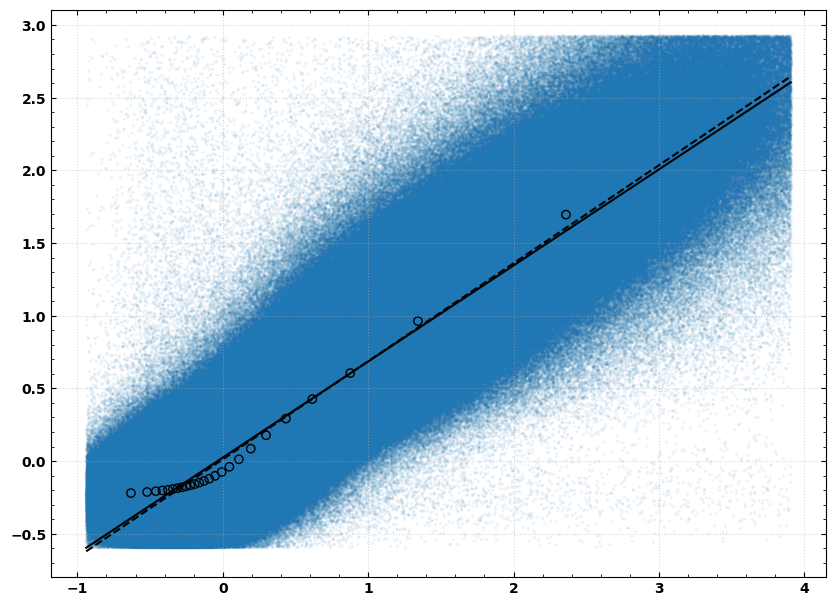

In [11]:
data1 = pipeline.hdu_data['hst_broad1'].data.flatten()
data2 = pipeline.hdu_data['hst_broad2'].data.flatten()

zero_mask = (data1!=0)&(data2!=0)
data1 = data1[zero_mask]
data2 = data2[zero_mask]

valid_indices = np.isfinite(data1) & np.isfinite(data2)
data1 = data1[valid_indices]
data2 = data2[valid_indices]

# Mask to only lowest value points 
x_per = np.percentile(data1, [0.1, 99])
y_per = np.percentile(data2, [0.1, 99])

x_mask = (data1>x_per[0])&(data1<x_per[1])
y_mask = (data2>y_per[0])&(data2<y_per[1])

data1 = data1[x_mask&y_mask]
data2 = data2[x_mask&y_mask]

bin_values = get_bins(data1, data2, 25, equal_spaced=False)

model_poly = models.Polynomial1D(degree=1)
fitter_poly = fitting.LinearLSQFitter() 
best_fit_poly = fitter_poly(model_poly, data1, data2)
best_fit_poly_bins = fitter_poly(model_poly, bin_values[0], bin_values[1])

xfit = np.linspace(np.nanmin(data1), np.nanmax(data1), 100)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')


ax.scatter(data1, data2, alpha=0.05, s=2)

ax.scatter(bin_values[0], bin_values[1], fc='none', ec='k')
ax.plot(xfit, best_fit_poly(xfit), c='k')
ax.plot(xfit, best_fit_poly_bins(xfit), 'k', ls='--')

ax.grid(True, ls=':', alpha=0.5)